# Project Report On Car Price Prediction Using Machine Learning

# Submitted by, Mr. Omkar Balwant Jadhav

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [Data](#0)
* [What Problem We Have and Which Metric to Use?](#1)

* [Exploratory Data Analysis](#2)
    * [Target Variable](#3)
    * [Numerical Features](#4)
    * [Categorical Features](#5)    
    
* [Model Selection](#6)    
    * [Baseline Model](#7)
    * [Models with Ridge & Lasso & ElasticNet and KNN](#8)
    * [Models with Random Forest & Extra Trees & Gradient Boosting & XGBoost](#9)    
    * [Best Model with Hyperparameter Tuning](#10)
    * [Feature Importance](#11)    


* [Conclusion](#12)


# 1. Collecting Data 


In [ ]:
import pandas as pd
data= pd.read_csv("C:\\Users\\Omkar\\Downloads\\CarPrice.csv")
data

# 2. Defining the problem statement
In this project, we study the data of Uber which is present in tabular format in which we use different libraries like numpy, pandas and matplotlib and different machine learning algorithms.

We study different columns of the table and try to co-relate them with others and find a relation between those two.

We try to find and analyze those key factors like date, month etc which helps Uber Company to enhance their business by focusing on those services and make required changes.

# 3. Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

It is a good practice to understand the data first and try to gather as many insights from it.

EDA is all about making sense of data in hand.

In [2]:
data.shape

(205, 26)

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE


In [26]:
df= pd.read_csv("C:\\Users\\Omkar\\Downloads\\CarPrice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [28]:
df.duplicated().sum()

0

In [29]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
car_ID,0,0.0
symboling,0,0.0
highwaympg,0,0.0
citympg,0,0.0
peakrpm,0,0.0
horsepower,0,0.0
compressionratio,0,0.0
stroke,0,0.0
boreratio,0,0.0
fuelsystem,0,0.0


In [30]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

- There is no zero variance variable. 
- Car ID column is repetition of the index. So I'll drop it.
- Carname has 147 different entity. I'll check it. And try to find a way to reduce the variance.
- Other than that there is no problem.

In [31]:
df1= df.copy()

In [32]:
df1['CarName'].sample(5)

14                   bmw z4
43               isuzu MU-X
35          honda accord lx
137                saab 99e
184    volkswagen model 111
Name: CarName, dtype: object

In [33]:
df1['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

- I'll use only the brands/make not the models.
- I have seen several typos, I'll handle those.

In [34]:
df1['model'] = [x.split()[0] for x in df1['CarName']]
df1['model'] = df1['model'].replace({'maxda': 'Mazda','mazda': 'Mazda', 
                                     'nissan': 'Nissan', 
                                     'porcshce': 'Porsche','porsche':'Porsche', 
                                     'toyouta': 'Toyota', 'toyota':'Toyota',
                            'vokswagen': 'Volkswagen', 'vw': 'Volkswagen', 'volkswagen':'Volkswagen'})


Let's drop the 'model' and 'carid' columns

In [35]:
df1= df1.drop(['car_ID','CarName'], axis=1)

In [36]:
print (f' We have {df1.shape[0]} instances with the {df1.shape[1]-1} features and 1 output variable')

 We have 205 instances with the 24 features and 1 output variable


In [37]:
numerical= df1.drop(['price'], axis=1).select_dtypes('number').columns

categorical = df1.select_dtypes('object').columns

print(f'Numerical Columns:  {df1[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df1[categorical].columns}')

Numerical Columns:  Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


Categorical Columns: Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'model'],
      dtype='object')


# Target Varable

In [38]:
df1['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [39]:
print( f"Skewness: {df1['price'].skew()}")

Skewness: 1.7776781560914454


<AxesSubplot:ylabel='Frequency'>

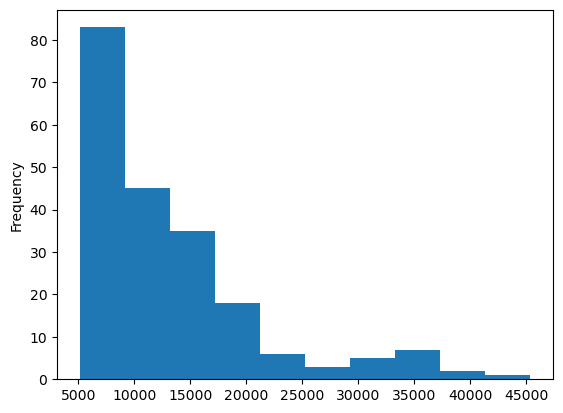

In [41]:
df1['price'].plot(kind='hist')

- Even though target variable has right skewness, I will not make any transformation on it.
- Let's see the numerical features

# Numerical Features

In [42]:
df1[numerical].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


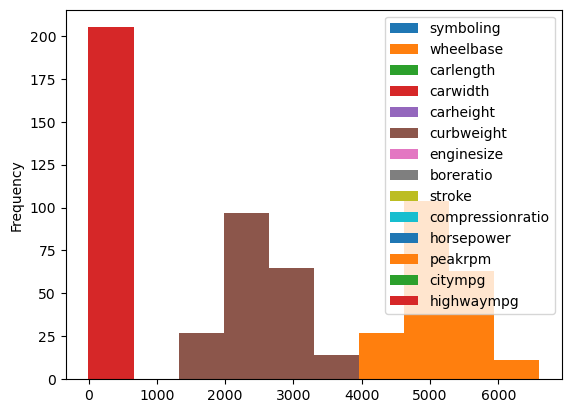

In [44]:
df1[numerical].plot(kind='hist');

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

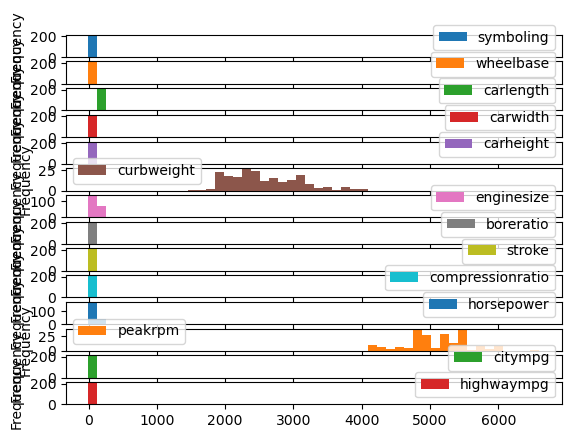

In [55]:
df1[numerical].plot(kind='hist',subplots=True,bins=50)

- Several features have gaussian-normal like ditsribution.
- I have also observed skewness.
- I'll look those in details.

In [48]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df1[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

compressionratio    2.610862
enginesize          1.947655
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
dtype: float64

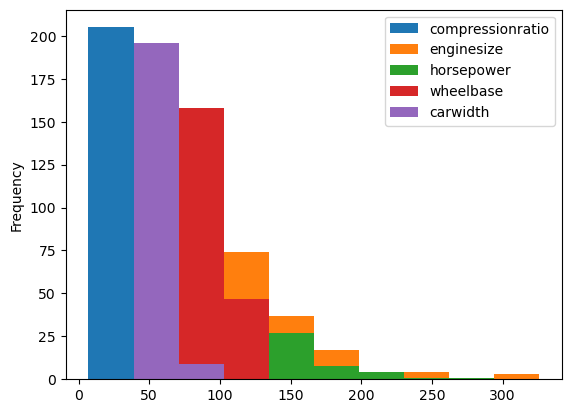

In [50]:
df1[skew_cols.index].plot(kind='hist');

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

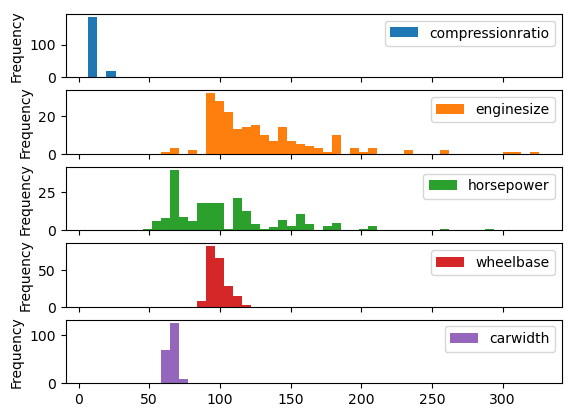

In [53]:
df1[skew_cols.index].plot(kind='hist',subplots=True,bins=50)


- Since this is a beginner friendly notebook, let's see several options in the practice without touching our main dataset.
- First I'll show np.log method.
- Then I'll use transformation methods.

# with np.log

compressionratio    2.379056
enginesize          0.864706
horsepower          0.489938
wheelbase           0.885024
carwidth            0.815331
dtype: float64



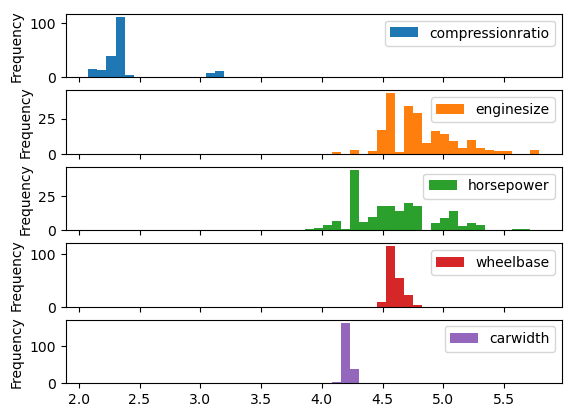

In [58]:
df_try = df1.copy()

for col in skew_cols.index.values:
    df_try[col] = df_try[col].apply(np.log1p)

print(df_try[skew_cols.index].skew())
print()

df_try[skew_cols.index].plot(kind='hist',subplots=True,bins=50);

# with Power Transformer

compressionratio    0.034222
enginesize         -0.002542
horsepower          0.049318
wheelbase          -0.003485
carwidth            0.000000
dtype: float64



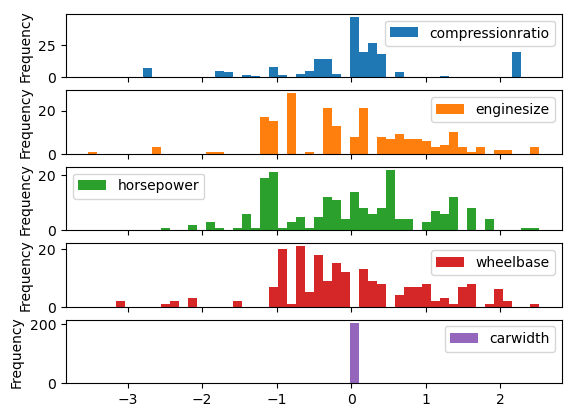

In [60]:
df_trans = df1[skew_cols.index].copy()
pt = PowerTransformer(method='yeo-johnson')
trans= pt.fit_transform(df_trans)
df_trans = pd.DataFrame(trans, columns =skew_cols.index )
print(df_trans.skew())
print()
df_trans.plot(kind='hist',subplots=True,bins=50);

- During the modelling process, we can use power transformer.
- Let's observe the correlation among the numerical features
- And also observe the correlation with the target variable

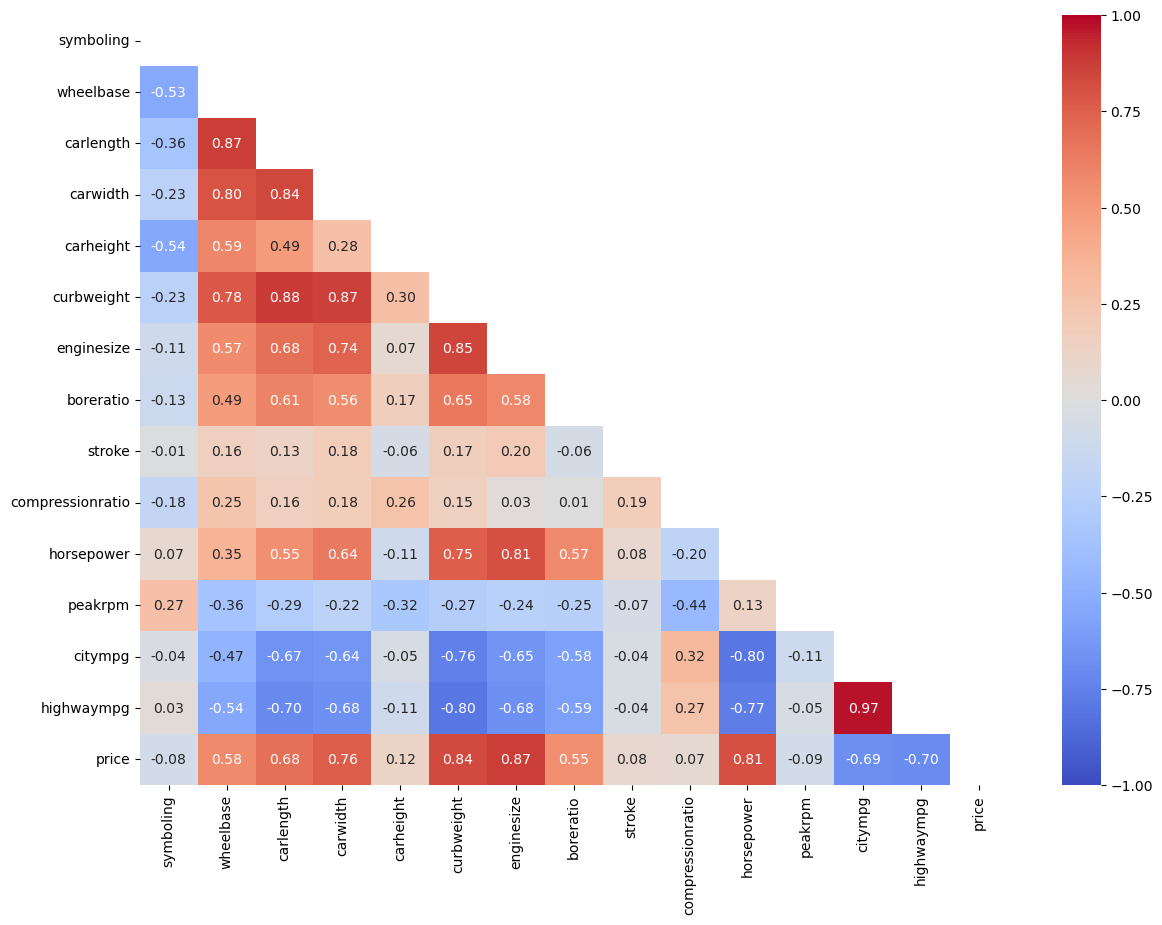

In [61]:
numerical1= df1.select_dtypes('number').columns


matrix = np.triu(df1[numerical1].corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (df1[numerical1].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

- We have 9 numerical features which have more than .5 correlation with the price variable.
- Which is a good sign for the prediction capability of the model, but still we need to see in the practice.
- From the threshold .9 perspective: Highwaympg and citympg has .97 correlation. We can drop one of them to avoid multicollinearity problems for the linear models.
- I have observed several highly correlated features below the .9 level.

- Let's drop the 'citympg'

In [62]:
df1 = df1.drop('citympg',axis=1)

# Categorical Features

In [63]:
df1[categorical].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,model
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


# Fuel Type and Price

fueltype
gas       12999.7982
diesel    15838.1500
Name: price, dtype: float64



array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

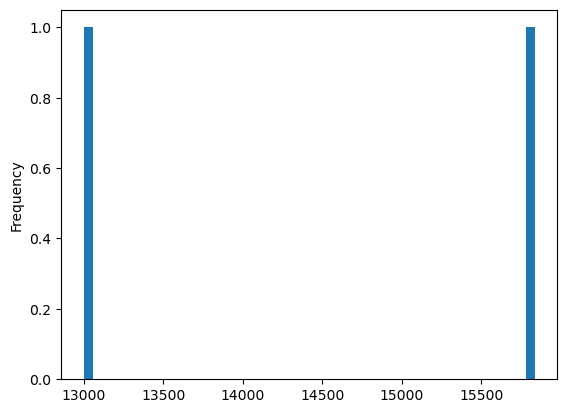

In [65]:
print(df1.groupby('fueltype')['price'].mean().sort_values())
print()
df1.groupby('fueltype')['price'].mean().plot(kind='hist',subplots=True,bins=50)

- Diesel cars are more expensive than cars with gas.

# 4. Model Selection

# Aspiration and Price

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64



array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

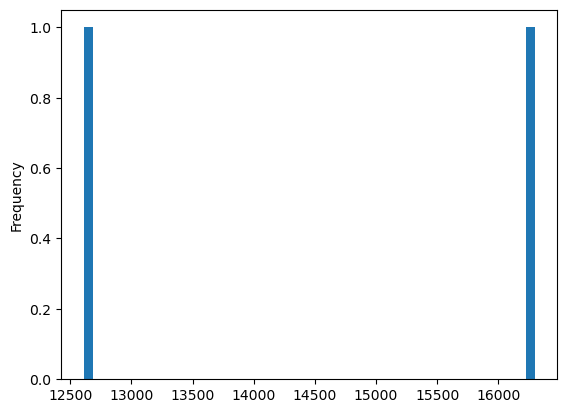

In [67]:
print(df1.groupby('aspiration')['price'].mean().sort_values())
print()
df1.groupby('aspiration')['price'].mean().plot(kind='hist',subplots=True,bins=50)

Turbo aspiration is more expensive than standard aspiration

# CarBody and Price

carbody
hatchback      10376.652386
wagon          12371.960000
sedan          14344.270833
convertible    21890.500000
hardtop        22208.500000
Name: price, dtype: float64



array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

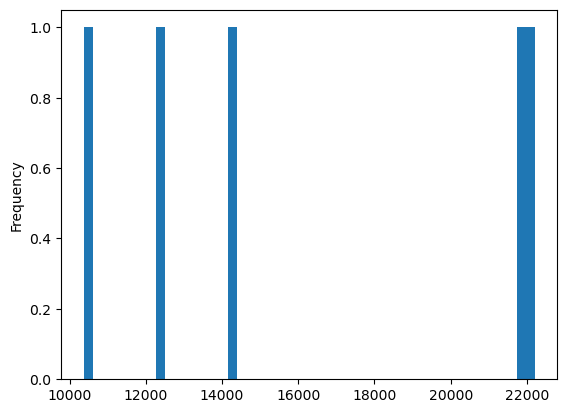

In [68]:
print(df1.groupby('carbody')['price'].mean().sort_values())
print()
df1.groupby('carbody')['price'].mean().plot(kind='hist',subplots=True,bins=50)

- Based on the price, there are differences among the carbody.
- While Wagon cars the leats expensive ones, hardtop and the convertibles are the most expensive ones.

# Drivewheel and Price

drivewheel
fwd     9239.308333
4wd    11087.463000
rwd    19910.809211
Name: price, dtype: float64



array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

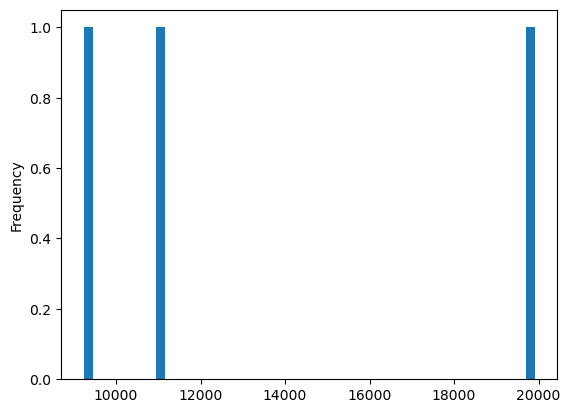

In [70]:
print(df1.groupby('drivewheel')['price'].mean().sort_values())
print()
df1.groupby('drivewheel')['price'].mean().plot(kind='hist',subplots=True,bins=50)

- Rear wheel drive cars are the most expensive ones.  Front wheel cars the least expensive ones.

# Engine Location and price

enginelocation
front    12961.097361
rear     34528.000000
Name: price, dtype: float64



array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

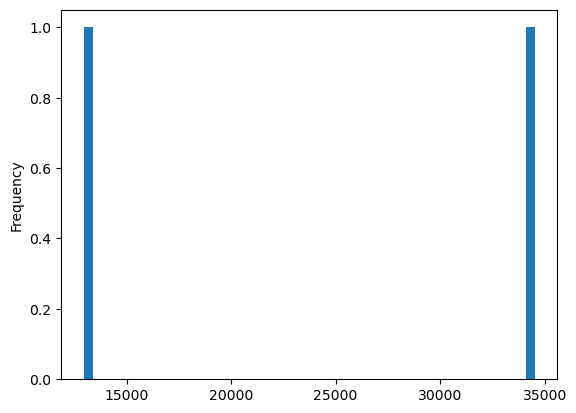

In [72]:
print(df1.groupby('enginelocation')['price'].mean().sort_values())
print()
df1.groupby('enginelocation')['price'].mean().plot(kind='hist',subplots=True,bins=50)

- There is a quite difference based on the engine location. Rear engine location almost 3 times expensive than front ones.

# Engine Type and Price

enginetype
ohc      11574.048426
rotor    13020.000000
ohcf     13738.600000
l        14627.583333
dohc     18116.416667
ohcv     25098.384615
dohcv    31400.500000
Name: price, dtype: float64



array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

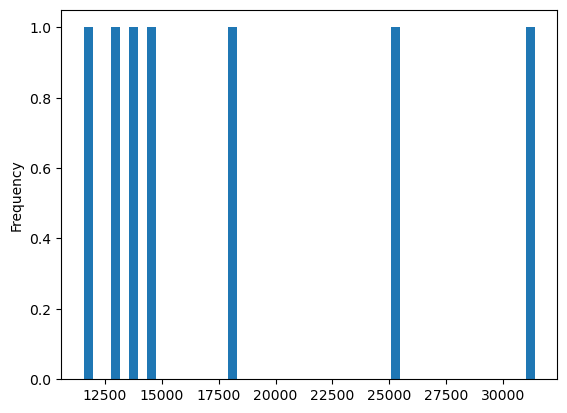

In [73]:
print(df1.groupby('enginetype')['price'].mean().sort_values())
print()
df1.groupby('enginetype')['price'].mean().plot(kind='hist',subplots=True,bins=50)

- Our dataset has 7 different engine types and price changes amongs them significantly.

# Fuel System and price

fuelsystem
2bbl     7478.151515
1bbl     7555.545455
spdi    10990.444444
spfi    11048.000000
4bbl    12145.000000
mfi     12964.000000
idi     15838.150000
mpfi    17754.602840
Name: price, dtype: float64



array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

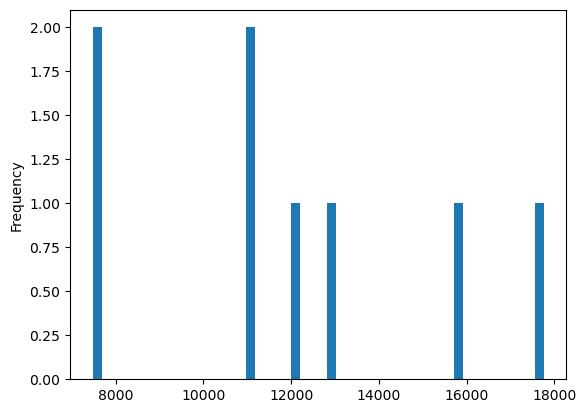

In [75]:
print(df1.groupby('fuelsystem')['price'].mean().sort_values())
print()
df1.groupby('fuelsystem')['price'].mean().plot(kind='hist',subplots=True,bins=50)

- Our dataset has 8 different fuel system and price changes amongs them significantly.

# Model and Price

model
chevrolet       6007.000000
dodge           7875.444444
plymouth        7963.428571
honda           8184.692308
subaru          8541.250000
isuzu           8916.500000
mitsubishi      9239.769231
renault         9595.000000
Toyota          9885.812500
Volkswagen     10077.500000
Nissan         10415.666667
Mazda          10652.882353
saab           15223.333333
peugeot        15489.090909
alfa-romero    15498.333333
mercury        16503.000000
audi           17859.166714
volvo          18063.181818
bmw            26118.750000
Porsche        31400.500000
buick          33647.000000
jaguar         34600.000000
Name: price, dtype: float64



array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

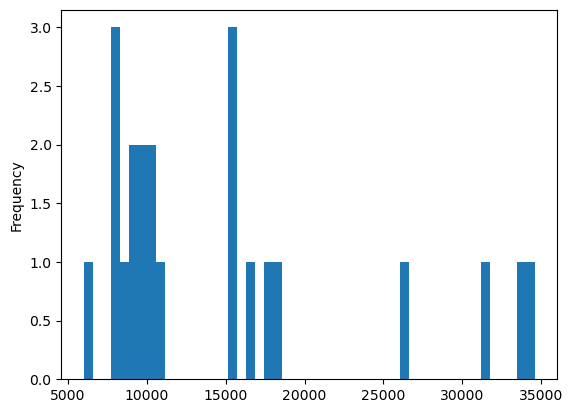

In [76]:
print(df1.groupby('model')['price'].mean().sort_values())
print()
df1.groupby('model')['price'].mean().plot(kind='hist',subplots=True,bins=50)

- Based on the model, Porsche, Buick and Jaguar are the most expensive ones.
- Chevroletis the least expensive model.

# Get The Dummies

In [77]:
df2 = pd.get_dummies(df1, columns=categorical, drop_first=True)
df2.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,model_isuzu,model_jaguar,model_mercury,model_mitsubishi,model_peugeot,model_plymouth,model_renault,model_saab,model_subaru,model_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


# Model Selection

- I'll use linear regression model as a base model
- And then I will use Ridge, Lasso, Elasticnet, KNeighborsRegressor and Support Vector MAchine Regressor
- And then i will use ensemble models, like Randomforest, Gradient Boosting and Extra Trees
-  Finally I will look at the XGBoost Regresson.
- And after evaluating the algorithm, we will select our best model.
- Let's start.

# Baseline Model

In [78]:
X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print (f'model : {model} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {r2_score(y_test, y_pred)}')




model : LinearRegression() and  rmse score is : 2650.560337022249, r2 score is 0.8985995076954914


- Baseline Model,in our case, Linear Regression model, without and scaling and transformation did a quite a good job.

# Ridge & Lasso & Elasticnet & KNN with Scaler and Transformer

In [79]:
rmse_test =[]
r2_test =[]
model_names =[]

numerical2= df2.drop(['price'], axis=1).select_dtypes('number').columns

X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

s = StandardScaler()
p= PowerTransformer(method='yeo-johnson', standardize=True)

rr = Ridge()
las = Lasso()
el= ElasticNet()
knn = KNeighborsRegressor()

models = [rr,las,el,knn]

for model in models:
    ct = make_column_transformer((s,numerical2),(p,skew_cols.index),remainder='passthrough')  
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),2)}')

model_names = ['Ridge','Lasso','ElasticNet','KNeighbors']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : Ridge() and  rmse score is : 2423.29, r2 score is 0.92
model : Lasso() and  rmse score is : 2329.06, r2 score is 0.92
model : ElasticNet() and  rmse score is : 3350.1, r2 score is 0.84
model : KNeighborsRegressor() and  rmse score is : 4048.13, r2 score is 0.76


C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.809e+07, tolerance: 8.716e+05
  model = cd_fast.enet_coordinate_descent(


,RMSE,R2_Test
Ridge,2423.29,0.92
Lasso,2329.06,0.92
ElasticNet,3350.10,0.84
KNeighbors,4048.13,0.76


- By using standard scaler and power transformer for the skewness;
- For linear models we got .92 for the R2 and
- 2307.47 RMSE which are better scores compare to the baseline model.

# Best Model with the Hyperparameter Tuning

In [81]:
X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators= 220, random_state=42 )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print (f' rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),4)}, r2 score is {round(r2_score(y_test, y_pred),4)}')




 rmse score is : 1975.8483, r2 score is 0.9437


- With hyperparameter tuning we got a lift. 
- RMSE (from 1984.44 to 1975.8483)
- R2 (from .9432 to .9437)

# Feature Importance

symboling : 0.001
wheelbase : 0.008
carlength : 0.013
carwidth : 0.024
carheight : 0.004
curbweight : 0.167
enginesize : 0.6
boreratio : 0.005
stroke : 0.003
compressionratio : 0.005
horsepower : 0.028
peakrpm : 0.005
highwaympg : 0.118
enginetype_ohc : 0.001
model_bmw : 0.006



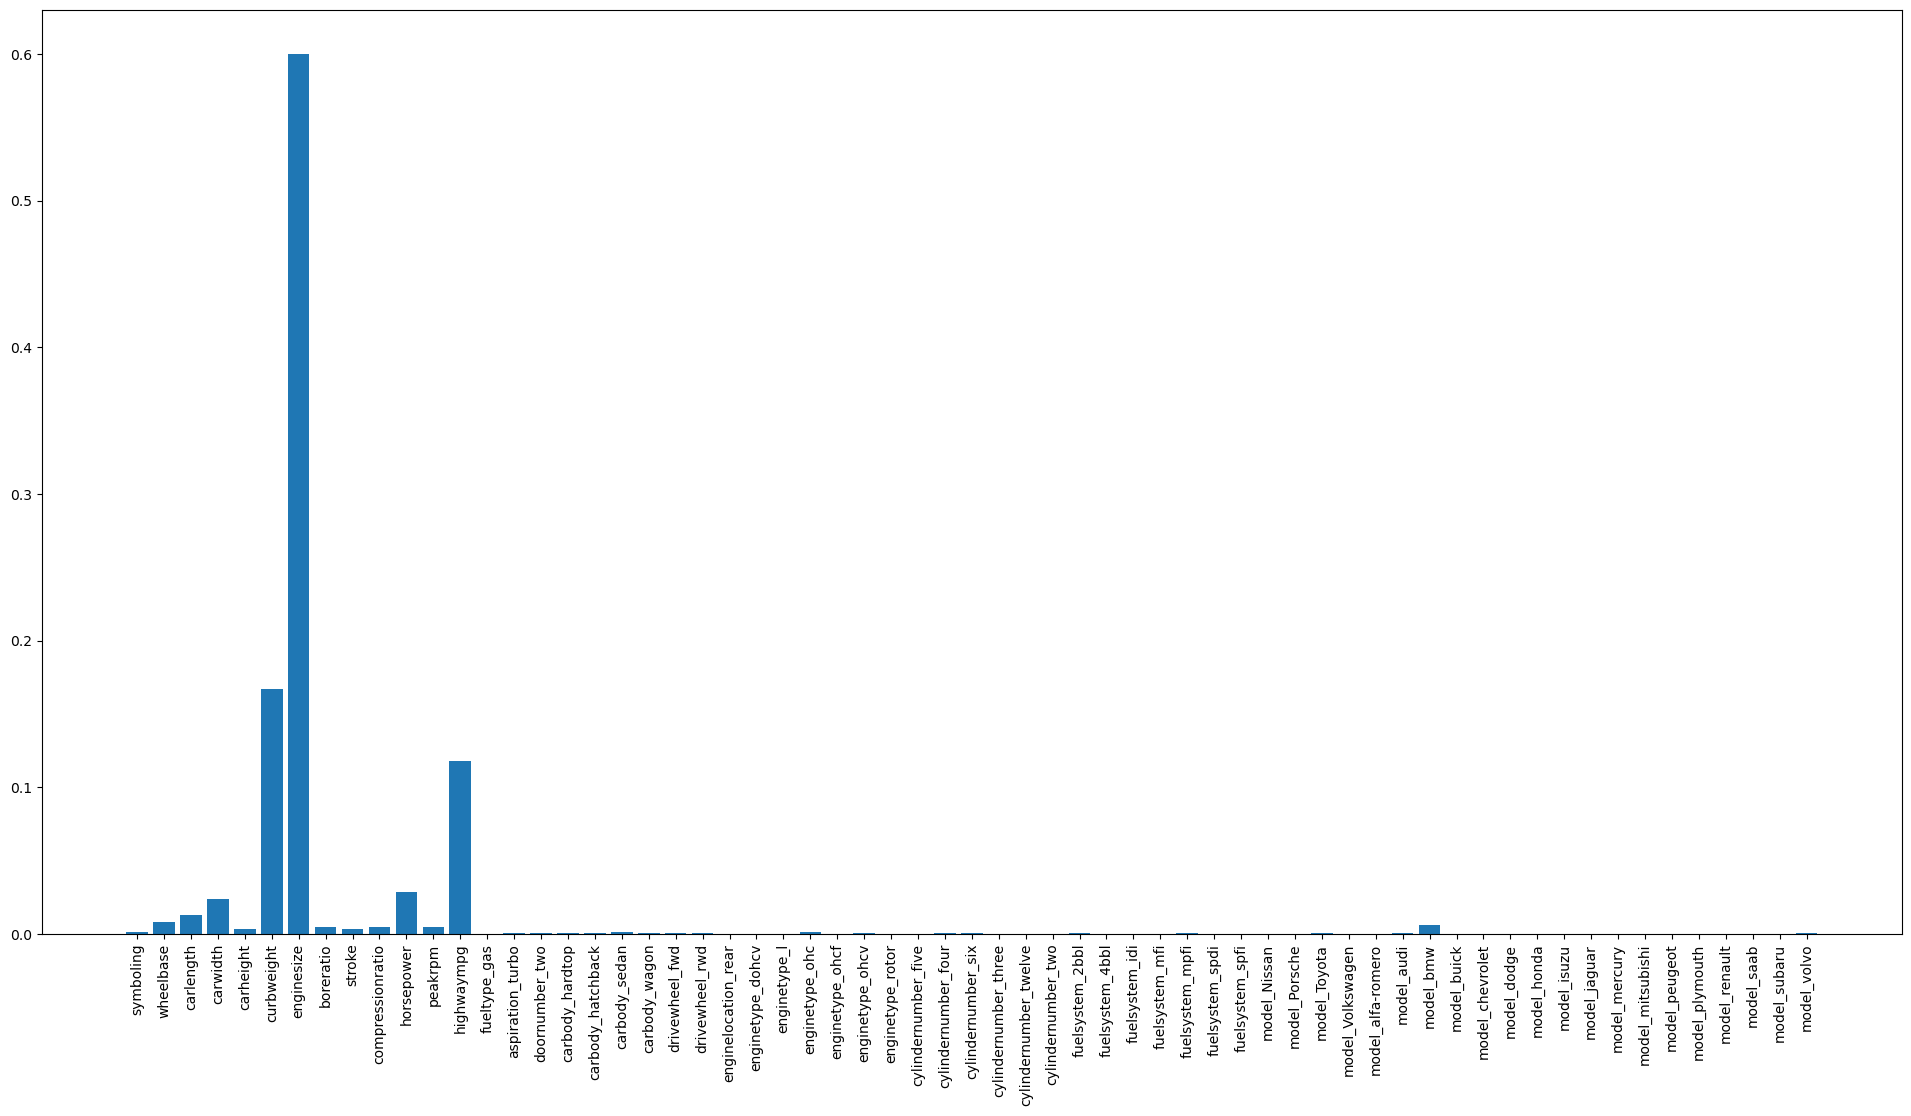

In [84]:
importances = rf.feature_importances_
feature_names = [f'feature {i}' for i in range(X.shape[1])]

# what are scores for the features
for i in range(len(rf.feature_importances_)):
    if rf.feature_importances_[i] >0.001:
        print(f'{X_train.columns[i]} : {round(rf.feature_importances_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(rf.feature_importances_))], rf.feature_importances_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (124,112)
plt.show()

- Based on the Random Forest Regressor:
   - **enginesize**
   - **curbweight**
   - **highway mpg**
   - **horse power**
- have biggest importance scores.


- It is important to note that Random Forest Regressor gave importance score bigger than 0 to 16 features.
- Model used 16 out of 63 features to get best prediction.

# 5. Conclusion

- We have developed model to predict car price problem.
- First, we  made the detailed exploratory analysis.
- We have decided which metric to use.
- We analyzed both target and features in detail.
- We transform categorical variables into numeric so we can use them in the model.
- We transform numerical variables to reduce skewness and get close to normal  distribution.
- We use pipeline to avoid data leakage.
- We looked at the results of the each model and selected the best one for the problem in hand.
- We made hyperparameter tuning of the best model see the improvement
- We looked at the feature importance.
- After this point it is up to you to develop and improve the models.